In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]
 
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(documents)
 
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

#Imprimir a matrix tfidf
corpus_index = [documents.index(n) for n in documents]
df = pd.DataFrame(X.todense(), index=corpus_index, columns=tfidf.get_feature_names())
print(df)


"""
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
 
 

    print("\n")
print("Prediction")
 
Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)
 
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
"""

       100       app     belly      best      came       cat   chrome  \
0  0.00000  0.000000  0.000000  0.000000  0.408248  0.000000  0.00000   
1  0.00000  0.000000  0.461149  0.386479  0.000000  0.000000  0.00000   
2  0.00000  0.542162  0.000000  0.000000  0.000000  0.000000  0.00000   
3  0.43025  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
4  0.00000  0.000000  0.000000  0.399323  0.000000  0.399323  0.00000   
5  0.00000  0.000000  0.000000  0.000000  0.000000  0.509814  0.00000   
6  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
7  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.47662   

   climbing    eating  extension    ...        photo      play  promoter  \
0  0.000000  0.408248    0.00000    ...     0.000000  0.408248   0.00000   
1  0.000000  0.000000    0.00000    ...     0.000000  0.000000   0.00000   
2  0.000000  0.000000    0.00000    ...     0.000000  0.000000   0.00000   
3  0.000000  0.000000    0.00000    ..

'\nprint("Top terms per cluster:")\norder_centroids = model.cluster_centers_.argsort()[:, ::-1]\nterms = tfidf.get_feature_names()\nfor i in range(true_k):\n    print("Cluster %d:" % i),\n    for ind in order_centroids[i, :10]:\n        print(\' %s\' % terms[ind]),\n    print\n \n \n\n    print("\n")\nprint("Prediction")\n \nY = vectorizer.transform(["chrome browser to open."])\nprediction = model.predict(Y)\nprint(prediction)\n \nY = vectorizer.transform(["My cat is hungry."])\nprediction = model.predict(Y)\nprint(prediction)\n'

### Sillhouette Coefficient
> Encontrando o melhor valor para k 

For n_clusters = 2 The average silhouette_score is : 0.03277823031295023


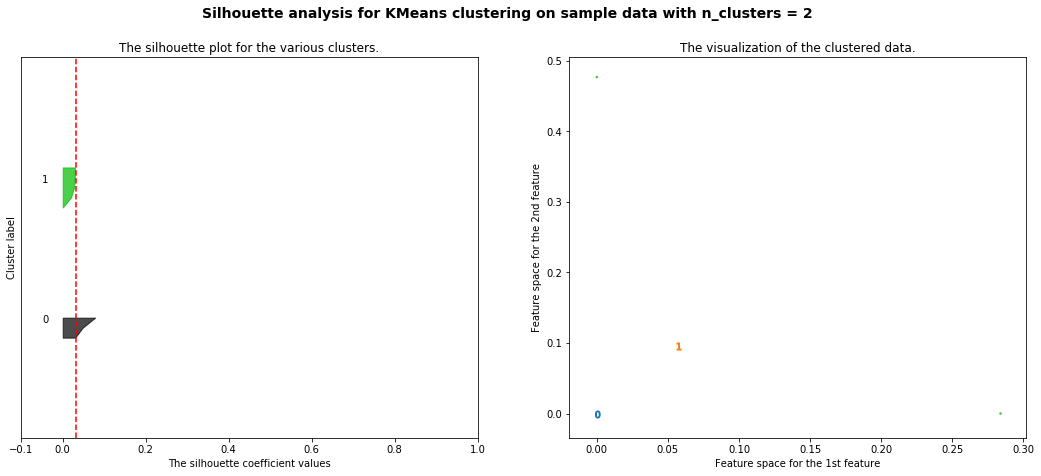

For n_clusters = 3 The average silhouette_score is : 0.034461737552938444


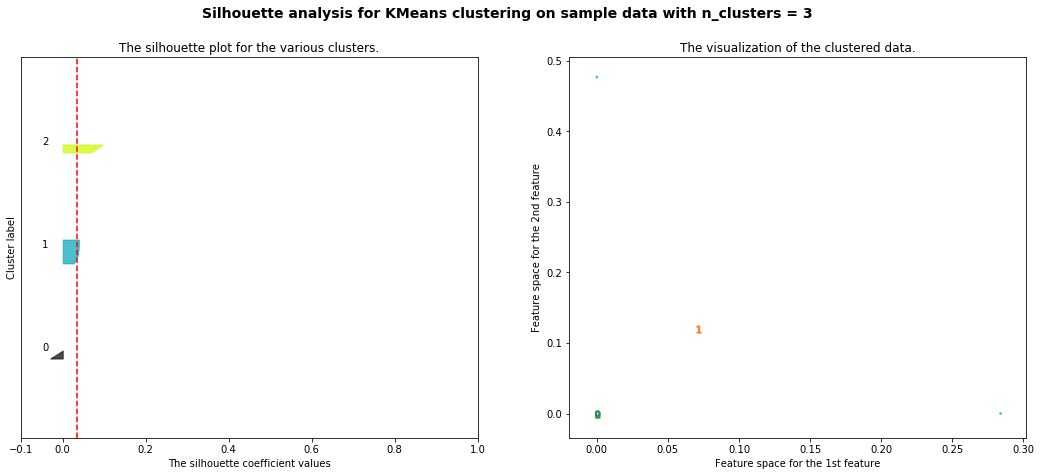

For n_clusters = 4 The average silhouette_score is : 0.03449524835185809


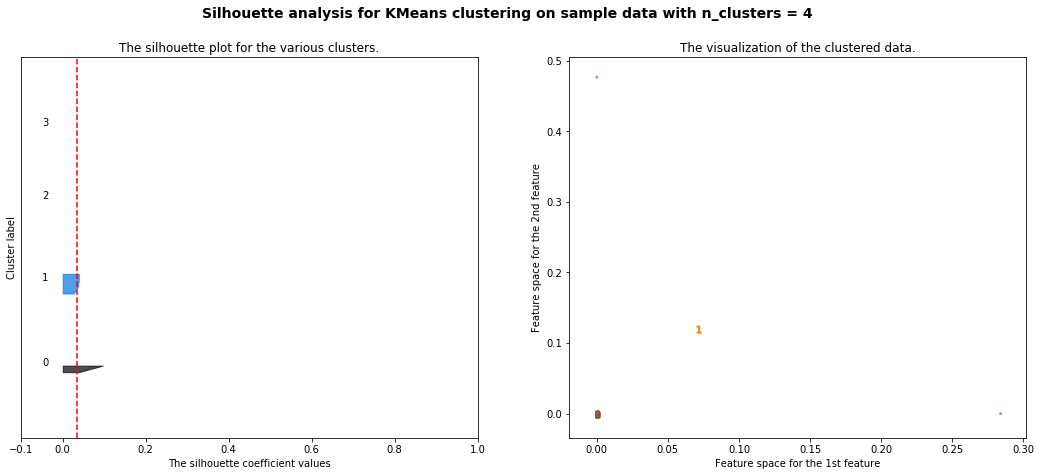

For n_clusters = 5 The average silhouette_score is : 0.02345124858743699


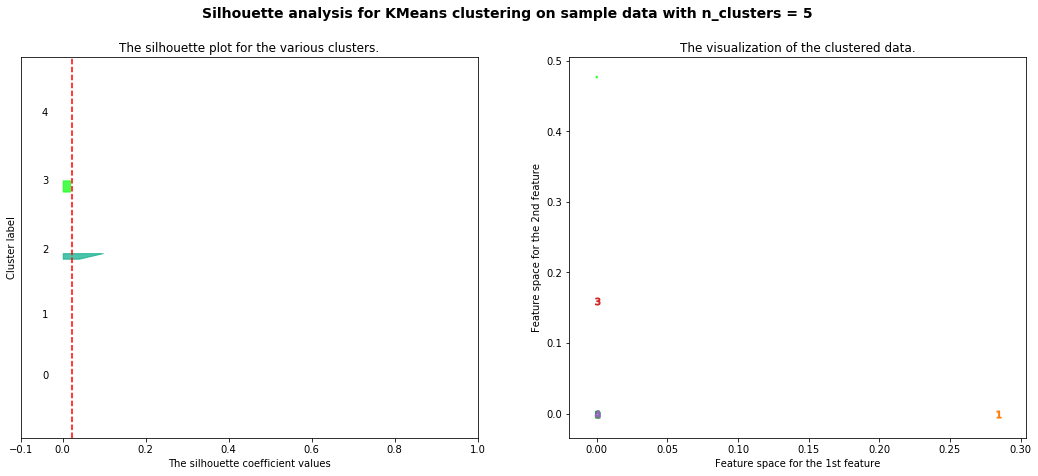

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

#tfidf = TfidfVectorizer(stop_words='english')
#X = tfidf.fit_transform(documents)


X_scaled = X
cluster_range = range( 2, 6 )

for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict( X_scaled )

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter([X_scaled[:, 0]], [X_scaled[:, 1]], marker='.', s=30, lw=0, alpha=0.7, c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter([centers[:, 0]],[centers[:, 1]],
              marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter([c[0]], [c[1]], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

    plt.show()